In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.formula.api as smf

In [205]:
ent=pd.read_csv('entries.csv')
siteRating=pd.read_csv('tempSiteRatings.csv')


In [206]:
userRatings=ent[ent.personId==23]
siteRatings=siteRating[siteRating.id.isin(userRatings.siteId)]
userRatings,siteRatings

(      id  personId  siteId  rating
 261  262        23      18       4
 271  272        23      21       7
 274  275        23      25       2
 280  281        23      26       4
 284  285        23      27       1
 297  298        23      29       2
 306  307        23      36       3
 313  314        23      41       6
 315  316        23      45       2
 319  320        23      47       1
 320  321        23      49       2
 322  323        23      51       5
 325  326        23      52       3
 326  327        23      53       2
 328  329        23      55       3
 331  332        23      56       2
 332  333        23      57       3
 333  334        23      58       1
 334  335        23      59       4
 335  336        23      60       3,     id  rateCount    rating
 16  18         24  4.875000
 19  21         24  6.541667
 23  25         24  3.750000
 24  26         24  3.916667
 25  27         24  4.583333
 27  29         24  5.166667
 34  36         24  4.125000
 39  41     

In [207]:
siteRating.head()

,id,rateCount,rating
0,1,24,5.00
1,3,25,5.00
2,4,25,3.60
3,5,25,2.84
4,6,25,3.52


In [208]:
ent.head()

,id,personId,siteId,rating
0,1,1,1,6
1,2,1,2,5
2,3,1,3,4
3,4,1,4,3
4,5,1,5,3


In [209]:
users=set(ent.personId.values)

In [210]:
user=172
def getUserRatings(user):
    userRatings=ent[ent.personId==user]
    siteRatings=siteRating[siteRating.id.isin(userRatings.siteId)]
    return userRatings.rating.values,siteRatings.rating.values


In [211]:
user,site=getUserRatings(user)

In [212]:
user

array([4, 5, 5, 3, 2, 5, 3, 3, 6, 7, 7, 4, 2, 2, 1, 3, 5, 4, 6, 6])

In [213]:
site

array([4.86956522, 4.86363636, 4.73913043, 3.91304348, 2.69565217,
       4.60869565, 4.56521739, 4.86956522, 6.39130435, 5.86956522,
       3.66666667, 3.33333333, 3.41666667, 3.95833333, 5.375     ,
       4.5       , 4.95833333, 5.70833333])

In [238]:
from statsmodels.stats.weightstats import ttest_ind
P=[]
T=[]
for i in users:
    user,site=getUserRatings(i)
    t_value,p_value,_=ttest_ind(user,site)
    if t_value>-9999:
        T.append(t_value)
        P.append(p_value)
    #print(abs(t_value),p_value,i)
    if p_value<0.001:
        print(i,p_value)

(8, 2.003889247209006e-05)
(23, 0.0005809608097146696)
(45, 5.726374198346593e-06)
(47, 0.00018656079553706353)
(71, 9.60175830575411e-05)
(72, 0.000679577972526717)
(92, 4.480794111618754e-06)


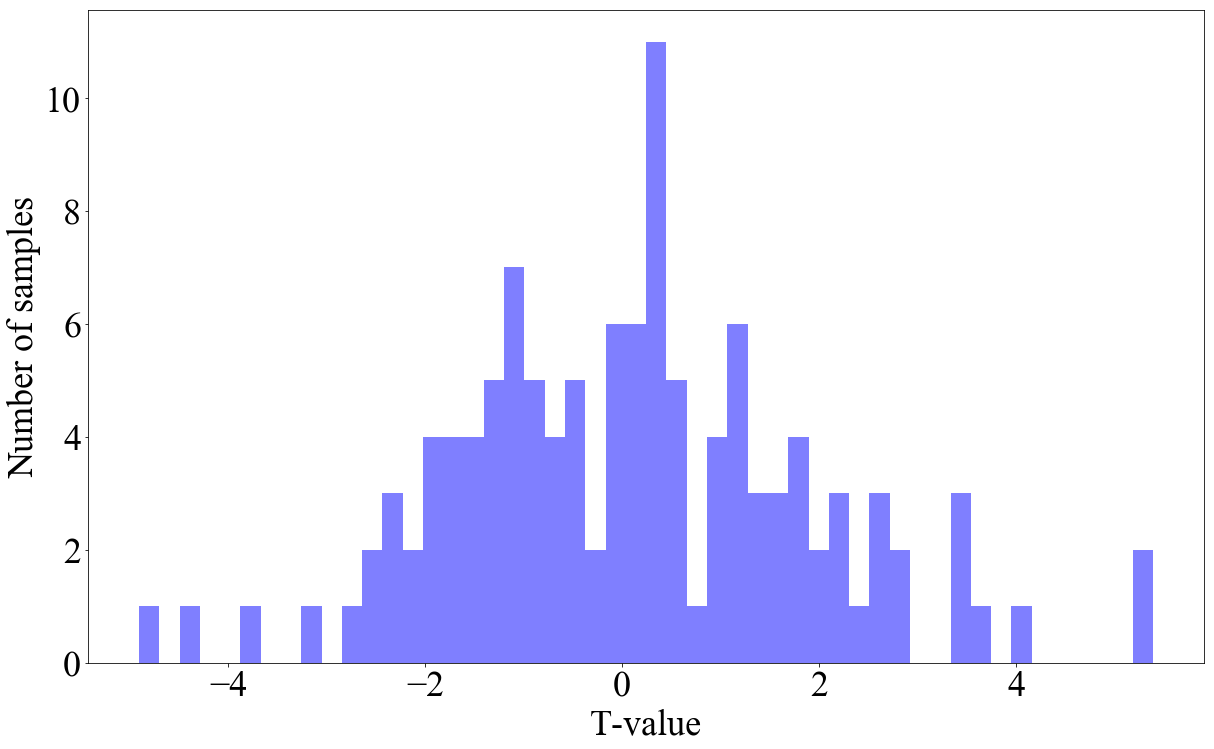

In [239]:
x=T
interval=None
num_bins=50
fig, ax = plt.subplots(figsize=(20,12))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 36
plt.xlabel("T-value")
plt.ylabel("Number of samples")
n, bins, patches = plt.hist(x,num_bins, range=interval,facecolor='blue', alpha=0.5)
plt.savefig("ttestRatings")
plt.show()

In [226]:
np.stats.norm([1,2,3])

AttributeError: 'module' object has no attribute 'stats'

In [228]:
np.linalg.norm(np.array(T))


20.071835245167193